## Laboratorio No. 3
- Paola De León 20361
- Gabriela Contreras 20213

In [1]:
#!pip install numpy-financial

In [2]:
import numpy as np
import random as rand
import scipy.stats as stats
import matplotlib.pyplot as plt

import math
import random
import numpy as np
import sympy as sp
from scipy.stats import gamma
import numpy_financial as npf


#### Parte No.2 ( Ejercicios sobre Números Aleatorios)

EJERCICIO 2.1


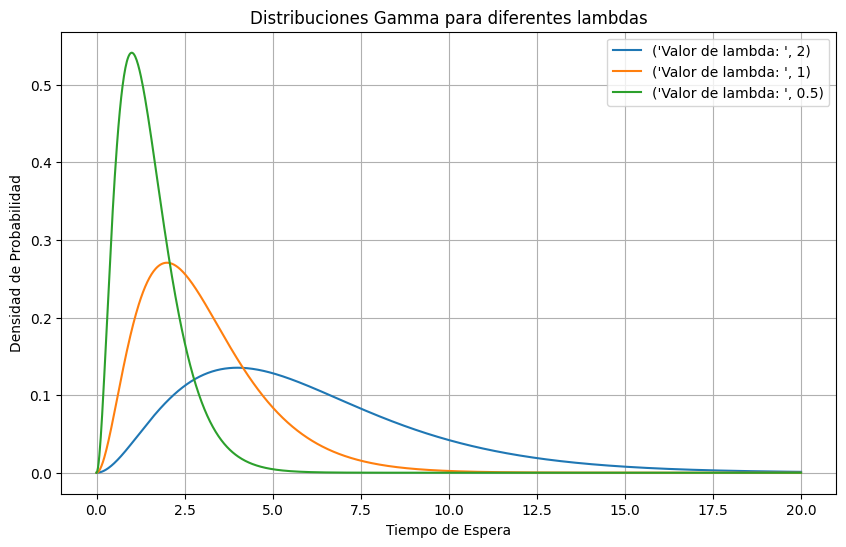


        ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera
        y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número
        de ocurrencias de un evento?

        En tanto al tiempo de espera se puede decir que existe una relación inversa en donde cuando el
        valor de lambda aumente, el tiempo de espera promedio disminuye y la dispersión de estos tiempos
        será menor. Por lo tanto, el valor lambda es un factor determinante para tiempo de espera.

    
EJERCICIO 2.2


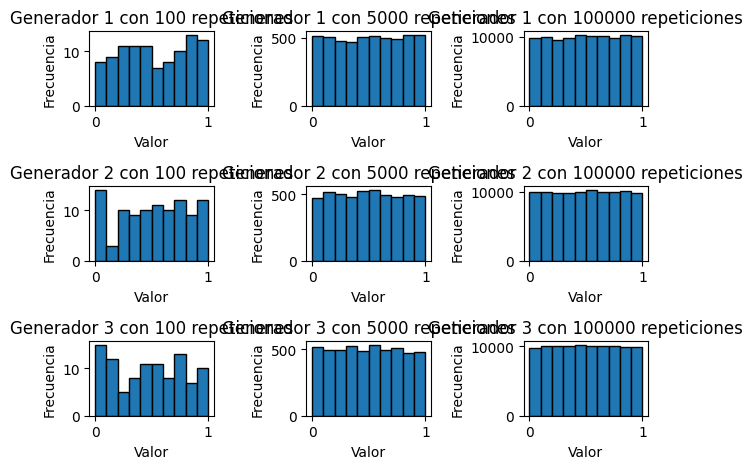


        ¿Qué generador le parece mejor? ¿Por qué?
        El primer generador nos parece mejor pues cuenta con una distribución bastante similar por lo que
        no existen valores que se repitan o mantengan en el mismo rango. Permitiendo así, obtener realmente
        un valor aleatorio.
    
    
EJERCICIO 2.3
Aproximación con 100 iteraciones en integral1: 0.4885028351595733
Aproximación con 10000 iteraciones en integral1: 0.500987063254009
Aproximación con 100000 iteraciones en integral1: 0.5008168521511094


Aproximación con 100 iteraciones en integral2: 1.0308585468012519
Aproximación con 10000 iteraciones en integral2: 0.8776965316328251
Aproximación con 100000 iteraciones en integral2: 0.8773845568556786




In [11]:
def ej2_1():
    # Ejecicio 2: task 1
    # Distribución gamma

    x = np.linspace(0, 20, 1000)
    lambdas = [2, 1, 0.5]
    k = 3

    plt.figure(figsize=(10, 6))
    for lambdaVal in lambdas:
        alpha = k
        beta = 1 / lambdaVal
        
        y = gamma.pdf(x, alpha, scale=1/beta)
        labelVal = ("Valor de lambda: ", lambdaVal)
        plt.plot(x, y, label=labelVal)
        
    plt.xlabel("Tiempo de Espera")
    plt.ylabel("Densidad de Probabilidad")
    plt.title("Distribuciones Gamma para diferentes lambdas")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(
    '''
        ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera
        y el número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número
        de ocurrencias de un evento?

        En tanto al tiempo de espera se puede decir que existe una relación inversa en donde cuando el
        valor de lambda aumente, el tiempo de espera promedio disminuye y la dispersión de estos tiempos
        será menor. Por lo tanto, el valor lambda es un factor determinante para tiempo de espera.

    ''')

# Ejercicio 2: task 2
def generador1(n:int):
    x = 1
    m = 2**35 - 1
    numbers = []
    
    for i in range(n):
        x = 5**5 * x % m
        numbers.append(x/m)
    
    return numbers

def generador2(n:int):
    x = 1
    m = 2**31 - 1
    numbers = []

    for i in range(n):
        x = 7**5 * x % m
        numbers.append(x/m)
    
    return numbers

def generador3(n:int):
    numbers = []

    for i in range(n):
        numbers.append(rand.random())

    return numbers

def ej2_2():
    repetitions = [100, 5000, 100000]

    for i, rep in enumerate(repetitions):
        dataGenerador1 = generador1(n=rep)
        dataGenerador2 = generador2(n=rep)
        dataGenerador3 = generador3(n=rep)
        
        # Create the histogram in the corresponding subplot
        plt.subplot(3, 3, i+1)
        num_bins = 10
        plt.hist(dataGenerador1, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 1 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        plt.subplot(3, 3, i+4)
        plt.hist(dataGenerador2, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 2 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

        plt.subplot(3, 3, i+7)
        plt.hist(dataGenerador3, bins=num_bins, range=(0, 1), edgecolor='black')
        plt.title(f'Generador 3 con {rep} repeticiones')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    print (
    '''
        ¿Qué generador le parece mejor? ¿Por qué?
        El primer generador nos parece mejor pues cuenta con una distribución bastante similar por lo que
        no existen valores que se repitan o mantengan en el mismo rango. Permitiendo así, obtener realmente
        un valor aleatorio.
    
    '''
    )

def integral1(y):
    return (math.exp(-((1/y)-1)) - math.exp(-2 * ((1/y)-1))) / y**2

def integral2(y):
    return 2*(math.exp(-((1/y)-1)**2))

def montecarlo_integral(f, iterations:int):
    total_sum = 0
    a = 0
    b = 1

    for i in range(iterations):
        random_x = random.uniform(a, b)
        total_sum += f(random_x)

    result = ((b - a) / iterations) * total_sum
    return result

def ej2_3():
    iteraciones = [100, 10000, 100000]
    integrales = [integral1, integral2]

    for integral in integrales:
        for iteracion in iteraciones:
            valIntegral = montecarlo_integral(integral, iteracion)
            print(f"Aproximación con {iteracion} iteraciones en {integral.__name__}: {valIntegral}")

        print('\n')
    
print('EJERCICIO 2.1')
ej2_1()
print('EJERCICIO 2.2')
ej2_2()
print('EJERCICIO 2.3')
ej2_3()

#### Parte No.3 (Ejercicios sobre Generación de V.A P1)

-- Muestra aleatoria generada por medio de una distribución geométrica --
2 1 4 8 9 1 2 3 2 2 1 2 1 1 7 9 1 4 6 6 3 4 1 1 4 1 3 6 4 1 1 1 2 1 3 2 3 1 2 1 2 3 4 6 2 3 2 2 3 1
2 1 1 4 1 3 2 1 11 1 5 6 5 1 1 4 2 2 1 3 3 1 3 2 17 3 4 2 1 3 1 1 3 3 2 4 6 2 1 2 1 3 3 10 2 1 2 3 4 1
3 10 4 1 9 3 1 2 4 1 1 1 1 1 4 12 2 1 3 3 3 4 5 2 3 1 1 1 7 2 1 6 4 3 1 6 4 2 2 3 5 2 20 1 6 10 1 1 1 5
5 3 8 5 1 3 4 1 4 10 1 12 4 2 1 11 1 7 3 4 5 1 1 3 6 1 1 2 2 1 6 1 1 4 4 1 1 2 6 1 5 1 3 2 3 3 2 1 3 1
1 5 1 1 4 3 5 13 2 1 1 2 3 6 8 2 1 7 1 1 11 10 6 10 2 6 3 5 2 1 2 6 1 9 4 2 9 6 2 9 5 3 10 5 4 4 1 2 4 4
1 2 2 1 3 3 7 2 6 6 13 6 1 1 1 2 1 3 2 4 1 1 6 1 2 2 1 1 7 4 1 2 5 7 2 6 4 5 7 7 1 6 1 1 1 4 2 1 6 3
1 4 4 7 1 1 3 3 3 5 1 1 1 1 1 4 2 2 8 4 5 1 2 9 5 1 3 2 13 5 2 2 1 1 2 1 2 3 3 1 3 2 3 1 2 1 1 2 1 6
6 4 6 2 1 2 7 2 6 3 1 3 1 3 2 1 4 11 2 1 2 1 3 6 3 3 2 7 2 3 3 4 9 1 2 1 12 1 5 2 1 3 2 3 1 4 3 6 13 3
2 7 1 3 4 3 8 1 1 4 4 11 4 1 3 2 2 2 1 4 1 4 7 1 2 1 2 4 4 5 3 4 10 12 1 1 3 4 4 2 9 3 4 3 1 2 3 3 6 3
5 1

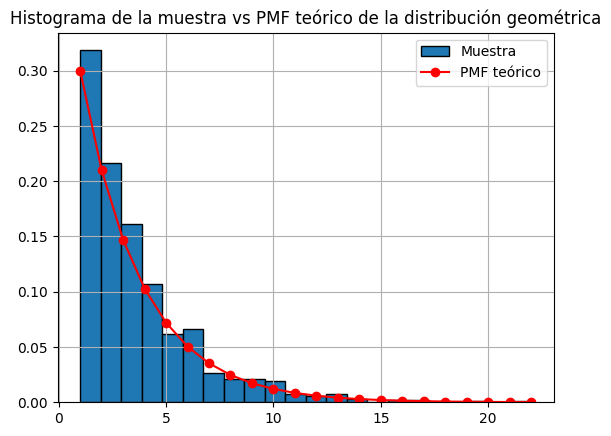

In [4]:
#TASK 1
p =  0.3 # parametro de forma 
q = 1 - p
x = 1000

#Funcion para imprimit muestra cada 50 elementos 
def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))

# Transformada Inversa distribución geométrica
def inversa_distGeom(q,x):
    muestra = []
    for i in range(x):
        u = rand.uniform(0, 1)
        X = int(np.ceil(np.log(u) / np.log(q)))
        muestra.append(X)
    return muestra

# PMF teórico de la distribución geométrica
def PMF_teorico(p,x,muestra):
    k  = range(1, max(muestra) + 1)
    px = stats.geom.pmf(k,p)
    return px , k



Muestra_geometrica = inversa_distGeom(q,x)
pmf , k= PMF_teorico(p,x,Muestra_geometrica)
# Imprimir el array en notación decimal
np.set_printoptions(suppress=True)

print("-- Muestra aleatoria generada por medio de una distribución geométrica --")
imprimir_cada_x_elementos(Muestra_geometrica)


print("\n--  PMF teórico de una distribución geométrica --")
print(pmf)

print("\n--  Historgrama --")
bns = max(Muestra_geometrica)-min(Muestra_geometrica)+1
plt.hist(Muestra_geometrica, bins=bns, density=True, edgecolor='black', label='Muestra')
plt.plot(k,pmf,'ro-', label='PMF teórico')
plt.title('Histograma de la muestra vs PMF teórico de la distribución geométrica')
plt.legend()
plt.grid(True)
plt.show()
#geometrica = stats.geom(p)

-- Muestra aleatoria generada por medio de una distribución poisson --
1 1 2 2 2 2 2 1 1 1 1 2 1 0 2 2 3 4 1 1 2 1 2 1 3 1 2 4 2 2 2 2 2 1 2 0 2 2 1 1 1 4 2 1 2 2 1 1 1 1
2 2 2 2 1 1 1 3 5 1 3 1 0 1 2 2 3 4 1 1 1 1 3 1 1 1 1 2 4 1 2 2 1 1 2 2 2 1 3 0 4 1 2 1 1 1 6 3 3 2
2 1 2 1 0 2 1 1 0 1 1 3 3 1 3 1 1 1 0 3 1 1 3 3 4 2 2 1 1 1 1 1 3 0 0 1 1 2 1 3 1 2 1 4 1 2 1 2 2 1
3 2 1 2 1 1 2 2 2 3 4 2 2 1 2 2 1 2 1 2 1 1 1 5 2 5 0 3 3 1 2 3 1 1 1 2 1 3 2 1 2 3 2 3 2 2 1 2 2 1
2 0 1 1 1 2 1 1 2 0 2 1 3 3 1 3 1 3 3 1 2 2 2 2 3 2 2 1 0 3 0 0 1 2 3 1 1 1 3 0 3 0 1 2 1 3 1 1 1 1
1 1 1 3 3 2 1 3 1 1 0 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 3 2 3 2 2 2 2 1 1 1 1 0 1 3 1 1 0 1 2 1
1 2 2 3 2 1 1 1 2 1 1 1 2 1 3 3 1 1 1 2 0 1 1 4 2 3 2 3 1 1 0 1 2 2 2 1 0 8 3 1 3 3 1 2 2 1 1 1 1 2
1 1 2 1 2 1 2 1 4 3 2 1 1 2 2 2 2 1 1 2 1 1 0 2 2 0 3 2 1 2 1 2 3 2 1 2 2 2 1 2 0 2 1 4 2 1 1 1 4 2
2 4 1 1 1 4 1 1 1 0 1 1 4 3 1 5 0 0 1 2 2 2 2 2 2 3 1 1 2 1 2 2 1 1 0 2 2 4 1 3 1 2 3 2 6 2 1 2 1 1
2 0 2 2 2 2 0 1 6 2 1 5 2 1 2

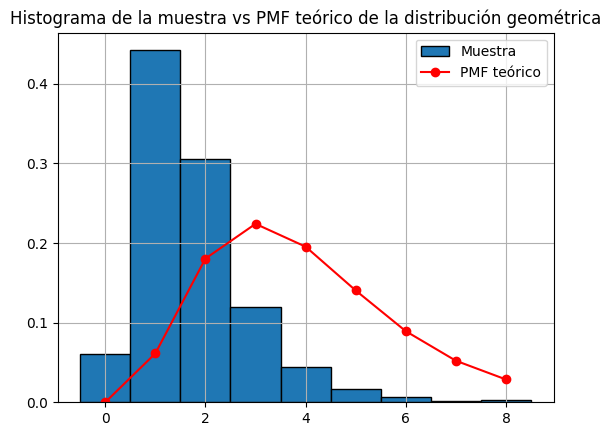

In [5]:
# TASK 2
lambd = 3
x = 1000

#Funcion para imprimit muestra cada 50 elementos 
def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))

def negative_poisson(x):
    muestra = []
    C = stats.poisson.pmf(lambd,3) / (3 * np.exp(-3) / 2)
    while len(muestra) < x:
        y = np.random.exponential(scale=1)
        u = np.random.uniform(0, 1)
        
        res = stats.poisson.pmf(lambd,y) / (C * stats.expon.pdf(y))

        if u <= res * C:
            muestra.append(int(y))
    return muestra

Muestra_negativa = negative_poisson(x)

print("-- Muestra aleatoria generada por medio de una distribución poisson --")
imprimir_cada_x_elementos(Muestra_negativa)


k = np.arange(0, max(Muestra_negativa) + 1)
pmf = [stats.poisson.pmf(lambd,k) for k in k]


print("\n--  Historgrama --")
bns = np.arange(-0.5, max(Muestra_negativa) + 1.5, 1)
plt.hist(Muestra_negativa, bins=bns, density=True, edgecolor='black', label='Muestra')
plt.plot(k,pmf,'ro-', label='PMF teórico')
plt.title('Histograma de la muestra vs PMF teórico de la distribución geométrica')
plt.legend()
plt.grid(True)
plt.show()
        

-- Muestra aleatoria generada por medio de una distribución poisson --
9 10 9 10 10 10 6 7 10 9 8 9 10 7 10 10 7 7 5 9 9 7 8 10 9 8 10 10 6 8 10 9 10 10 9 10 4 3 7 10 10 3 9 9 9 9 9 10 10 6
10 10 5 10 9 8 3 9 10 10 5 8 10 8 5 10 10 10 6 9 10 7 9 9 10 5 10 10 10 6 10 7 9 10 6 10 10 10 6 10 6 6 9 9 9 4 8 9 10 6
9 7 4 10 10 9 10 7 7 7 9 6 8 9 10 7 9 9 10 9 8 8 7 8 10 9 2 6 9 6 7 7 10 10 9 7 7 8 9 8 7 5 10 8 6 6 10 10 9 8
9 9 7 10 9 8 9 8 9 6 7 10 8 10 8 7 7 10 4 9 5 9 10 8 10 10 2 5 9 9 6 9 10 8 4 10 7 9 8 10 8 6 10 10 10 6 7 10 9 5
10 6 7 6 10 7 7 8 9 8 6 9 5 9 10 8 2 10 4 4 10 8 10 10 8 10 9 10 10 8 6 10 9 5 8 6 9 6 10 8 9 10 10 9 6 9 10 9 9 9
8 10 9 7 6 9 5 7 4 7 10 10 10 8 10 10 5 8 7 8 8 9 10 4 9 9 9 10 10 6 9 7 5 10 8 4 4 8 9 8 6 9 7 6 9 7 10 9 8 5
10 5 6 9 7 9 6 7 8 5 7 9 7 6 10 9 6 7 9 8 10 4 6 6 7 8 9 8 10 7 10 10 8 10 8 7 9 10 9 10 9 4 10 10 10 10 10 8 10 9
10 10 10 9 7 7 6 6 10 8 10 10 8 8 7 5 10 8 7 7 5 10 10 8 5 6 6 8 9 10 8 8 9 9 9 6 9 7 9 9 8 10 8 8 10 5 9 9 8 9
8 10 8 8 5 

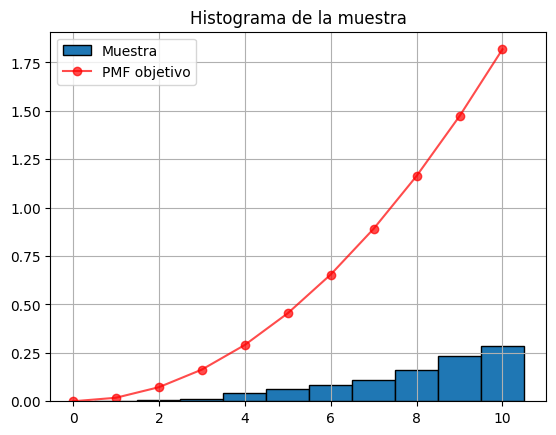

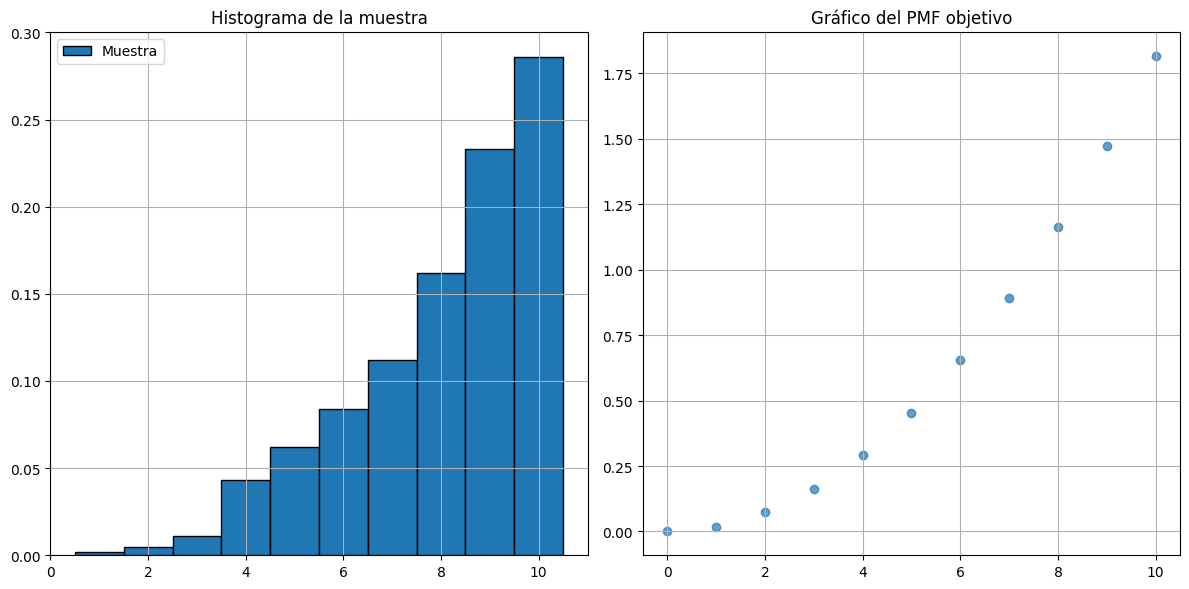

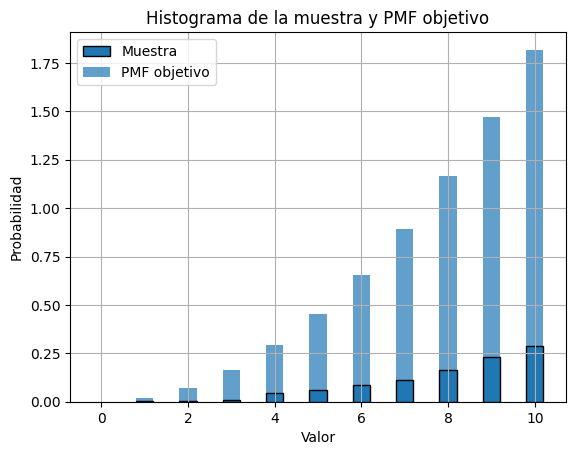

In [6]:
#TASK 3
x = 1000
val = np.arange(0, 11)

def imprimir_cada_x_elementos(arr):
    for i in range(0, len(arr), 50):
        sub_array = arr[i:i+50]
        print(" ".join(map(str, sub_array)))
        
def aceptacion_rechazo(x,val,prop,C):
    muestra = []
    while len(muestra) < x:
        y = np.random.choice(val)
        u = np.random.uniform(0, 1)
        
        res = (np.power(y,2)) / 55/ (C * prop[y - 1])

        if u <= res :
            muestra.append(int(y))
    return muestra
 
x = 1000
val = np.arange(0, 11)
prob = [(np.power(i,2)) / 55 for i in val]
propuesta = np.ones_like(val) / len(val)
C = max(prob) / max(propuesta)
muestra_def = aceptacion_rechazo(x,val,propuesta,C)


print("-- Muestra aleatoria generada por medio de una distribución poisson --")
imprimir_cada_x_elementos(muestra_def)


print("\n--  Historgrama --")
#OPCION 1 
plt.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra')
plt.plot(val, prob,'ro-', label='PMF objetivo', alpha=0.7)
plt.title('Histograma de la muestra')
plt.legend()
plt.grid(True)
plt.show()


#OPCION 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra')
ax1.set_title('Histograma de la muestra')
ax1.legend()
ax1.grid(True)

ax2.scatter(val, prob, label='PMF objetivo', alpha=0.7)
ax2.set_title('Gráfico del PMF objetivo')
ax2.grid(True)


plt.tight_layout()
plt.show()

#OPCION 3
plt.bar(val, prob, label='PMF objetivo', alpha=0.7, width=0.4)
plt.hist(muestra_def, bins=np.arange(0.5, 10.6, 1), density=True, edgecolor='black', label='Muestra', rwidth=0.4)
plt.title('Histograma de la muestra y PMF objetivo')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

#### Parte No.4 (Ejercicios sobre Generación de V.A P2)

EJERCICIO 4.1

    ** Método de descomposición: **
    Este método permite obtener variables aleatorias con una distribución dada a partir de variables
    uniformes entre los rangos 0 y 1 en donde estas pueden llegar a ser complejas; es por esto que
    utilizando este método se reduce la generación de variables aleatorias para lograr simplificar los
    pasos y que cada una de las secciones sea más manejable.

    La base del mismo consiste en descomponer la función de distribución acumulada (CDF)
    de la V.A deaseada en subintervalos para simplificarlas y así realizar las transformaciones para 
    ajustar esas distribuciones en cada subintervalo al intervalo de interés.

    -

    ** Pasos: **
    1. Determinar la CDF de la variable que se busca generar.
    2. Descomponer la función en subintervalos para calcular la inversa.
    3. Generar una V.A uniforme U en el intervalo de 0 a 1.
    4. Utilizar la inversa de la función para transformar U en una V.A en el subintervalo.
    

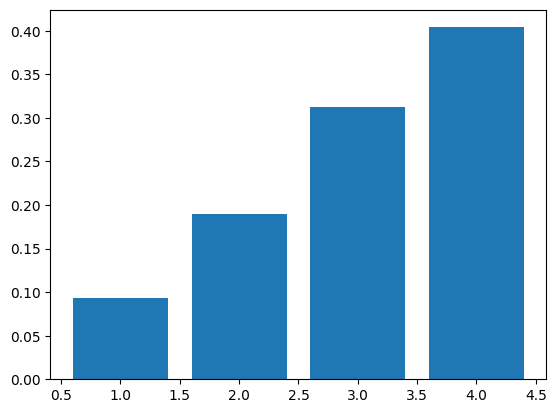

In [9]:
def ej4_1():
    print(
    '''
    ** Método de descomposición: **
    Este método permite obtener variables aleatorias con una distribución dada a partir de variables
    uniformes entre los rangos 0 y 1 en donde estas pueden llegar a ser complejas; es por esto que
    utilizando este método se reduce la generación de variables aleatorias para lograr simplificar los
    pasos y que cada una de las secciones sea más manejable.

    La base del mismo consiste en descomponer la función de distribución acumulada (CDF)
    de la V.A deaseada en subintervalos para simplificarlas y así realizar las transformaciones para 
    ajustar esas distribuciones en cada subintervalo al intervalo de interés.

    -

    ** Pasos: **
    1. Determinar la CDF de la variable que se busca generar.
    2. Descomponer la función en subintervalos para calcular la inversa.
    3. Generar una V.A uniforme U en el intervalo de 0 a 1.
    4. Utilizar la inversa de la función para transformar U en una V.A en el subintervalo.
    5. Repetir los pasos 3 y 4 para obtener la muestra.

    '''
    )

def ej4_2():
    # Función de probabilidades
    p = [0.1, 0.2, 0.3, 0.4]
    x = [1, 2, 3, 4] 

    # Variable aleatoria
    random_var = np.random.choice(x, p=p, size=1000)

    # Histo
    plt.hist(random_var, bins=[0.5, 1.5, 2.5, 3.5, 4.5], rwidth=0.8, density=True)
    plt.show()

def ej4_3():

    vpn_comparar = 0.1

    # Flujos
    flujoInitHotel = -800
    flujoInitCC = -900
    flujosHotel = [(-800, 50), (-800, 100), (-700, 150), (300, 200), (400, 200), (500, 200), (200, 8440)]
    flujosCC = [(-600, 50), (-200, 50), (-600, 100), (250, 150), (350, 150), (400, 150), (1600, 6000)]

    # Simulaciones
    for num_simulaciones in [100, 1000, 10000]:
        
        npvHotel = []
        npvCC = []

        for i in range(num_simulaciones):
            simuHotel = []
            simuCC = []
            
            for flujo in flujosHotel:
                simulado = np.random.normal(flujo[0], flujo[1])
                simuHotel.append(simulado)
            
            for flujo in flujosCC:
                simulado = np.random.normal(flujo[0], flujo[1])
                simuCC.append(simulado)
            
            # Calcular el NPV para hotel y centro comercial
            npvHotel.append(npf.npv(vpn_comparar, np.append(flujoInitHotel, simuHotel)))
            npvCC.append(npf.npv(vpn_comparar, np.append(flujoInitCC, simuCC)))
        
        # Calcular promedio del NPV
        npv_promedio_hotel = np.mean(npvHotel)
        npv_promedio_centro_comercial = np.mean(npvCC)
        
        print(f'''
Cant simulaciones: {num_simulaciones} 
- Hotel: {npv_promedio_hotel}
- Centro Comercial: {npv_promedio_centro_comercial}
        ''')

        print(f"    Conclusión Hotel ({num_simulaciones} simulaciones)")
        if npv_promedio_hotel < 0 :
            print(f'''
            No se recomienda invertir en el proyecto del hotel pues se estima que habrá una pérdida de
            aproximadamente {npv_promedio_hotel*-1}. Por lo tanto se puede decir que el proyecto NO es 
            rentable. 
            ''')
        else: 
            print(f'''
            Se recomienda invertir en el proyecto del hotel pues se estima que habrá una ganancia de 
            aproximadamente {npv_promedio_hotel}. Por lo tanto se puede decir que el proyecto SI es 
            rentable. 
            ''')

        print(f"    Conclusión Centro Comercial ({num_simulaciones} simulaciones)")
        if npv_promedio_centro_comercial < 0 :
            print(f'''
            No se recomienda invertir en el proyecto del centro comercial pues se estima que habrá una 
            pérdida de aproximadamente {npv_promedio_centro_comercial*-1}. Por lo tanto se puede decir que el pro-
            yecto NO es rentable. 
            ''')
        else: 
            print(f'''
            Se recomienda invertir en el proyecto del centro comercial pues se estima que habrá una 
            ganancia de aproximadamente {npv_promedio_centro_comercial}. Por lo tanto se puede decir que el pro-
            yecto SI es rentable. 
            ''')

print('EJERCICIO 4.1')
ej4_1()
print('EJERCICIO 4.2')
ej4_2()

In [10]:
print('EJERCICIO 4.3')
ej4_3()

EJERCICIO 4.3

Cant simulaciones: 100 
- Hotel: -1784.7142999613693
- Centro Comercial: -617.6842178762623
        
    Conclusión Hotel (100 simulaciones)

            No se recomienda invertir en el proyecto del hotel pues se estima que habrá una pérdida de
            aproximadamente 1784.7142999613693. Por lo tanto se puede decir que el proyecto NO es 
            rentable. 
            
    Conclusión Centro Comercial (100 simulaciones)

            No se recomienda invertir en el proyecto del centro comercial pues se estima que habrá una 
            pérdida de aproximadamente 617.6842178762623. Por lo tanto se puede decir que el pro-
            yecto NO es rentable. 
            

Cant simulaciones: 1000 
- Hotel: -2242.826425306436
- Centro Comercial: -510.27917490292714
        
    Conclusión Hotel (1000 simulaciones)

            No se recomienda invertir en el proyecto del hotel pues se estima que habrá una pérdida de
            aproximadamente 2242.826425306436. Por lo t